# Training 
## Apply Chi2 on Data

This notebook finds the best parameters for each of the different classifiers that achieve the maximuma accuracy.

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = pd.read_pickle('x.pkl')
y = pd.read_pickle('y.pkl')

# Select Best Features using Chi2

In [3]:
sk_best = SelectKBest(chi2, 10)
sk_best.fit(x, y)

SelectKBest(k=10, score_func=<function chi2 at 0x1a141e9ae8>)

In [4]:
sk_best.get_support()

array([False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)

In [5]:
new_x = x.iloc[:, sk_best.get_support()]
new_x.head()

,review_count,0.5m_count,1m_count,2m_count,2m_count_similar,3m_count,3m_count_similar,is_fastfood,income,is_chain
0,29.0,12,18,55,25,112,36,True,53800.0,True
1,182.0,21,44,98,23,167,35,False,84000.0,True
2,99.0,5,30,80,24,136,34,False,27835.0,True
3,21.0,9,32,83,16,241,30,False,42807.0,True
4,109.0,26,59,112,23,148,36,True,103562.0,True


# Train Test Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.2, random_state = 10,\
                                                    stratify = y)

In [7]:
def train_and_test(clf=DecisionTreeClassifier()):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    try:
        result = dict()
        result['accuracy']  = clf.score(x_test, y_test)
        result['precision'] = precision_score(y_test, y_pred)
        result['recall']    = recall_score(y_test,y_pred)
        result['f1']        = f1_score(y_test.values,y_pred)
        result['matrix']    = confusion_matrix(y_test.values, y_pred)
        dt_scores = cross_val_score(clf, x_train, y_train, cv=10)
        result['cval_score'] = np.mean(dt_scores)
        result['score'] = clf.predict_proba(x_test)[:,1]
        try:
            result['imp_features'] = clf.feature_importances_
        except:
            result['imp_features'] = None
        return result
    except UndefinedMetricWarning:
        return None

# DECISION TREES

In [8]:
criterions = ['entropy', 'gini']
splitters = ['random', 'best']
depths = [5, 10, None]
min_samples_splits = [0.50, 0.25, 2]
min_samples_leafs = [1, 10]

In [9]:
results = []
for c, s, d, mss, msl in list(itertools.product(criterions, splitters, depths, min_samples_splits, min_samples_leafs)):
    clf = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=d, min_samples_split=mss, min_samples_leaf=msl)
    result = train_and_test(clf)
    if result is not None:
        result['criterion'] = c
        result['splitter'] = s
        result['depth'] = d
        result['mss'] = mss
        result['msl'] = msl
        results.append(result)

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

In [10]:
tree_df = pd.DataFrame.from_dict(results)
tree_df.head()

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,precision,recall,score,splitter
0,0.742081,entropy,0.744530,5.0,0.0,"[0.327364683615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[492, 0], [171, 0]]",1,0.50,0.0,0.0,"[0.35552193646, 0.35552193646, 0.167865707434,...",random
1,0.742081,entropy,0.747171,5.0,0.0,"[0.358386710085, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[492, 0], [171, 0]]",10,0.50,0.0,0.0,"[0.357414448669, 0.357414448669, 0.16786570743...",random
2,0.742081,entropy,0.781122,5.0,0.0,"[0.356737706969, 0.0782174044443, 0.0188772407...","[[492, 0], [171, 0]]",1,0.25,0.0,0.0,"[0.401746724891, 0.394549763033, 0.19134993446...",random
3,0.742081,entropy,0.752456,5.0,0.0,"[0.454806289602, 0.100951947206, 0.01980225755...","[[492, 0], [171, 0]]",10,0.25,0.0,0.0,"[0.484008528785, 0.349693251534, 0.15064102564...",random
4,0.742081,entropy,0.778831,5.0,0.0,"[0.433893216692, 0.0427127551786, 0.0160329543...","[[492, 0], [171, 0]]",1,2.00,0.0,0.0,"[0.4, 0.4, 0.114583333333, 0.217922606925, 0.4...",random


In [11]:
tree_df.loc[[tree_df['accuracy'].idxmax(), tree_df['precision'].idxmax(), tree_df['cval_score'].idxmax()]]

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,precision,recall,score,splitter
17,0.790347,entropy,0.787906,NaN,0.512281,"[0.52295719672, 0.0768376116275, 0.05719864504...","[[451, 41], [98, 73]]",10,2.0,0.640351,0.426901,"[0.294117647059, 0.3, 0.0952380952381, 0.47222...",random
40,0.746606,gini,0.765243,5.0,0.045455,"[0.543576492134, 0.104260668458, 0.00023058102...","[[491, 1], [167, 4]]",1,2.0,0.800000,0.023392,"[0.475452196382, 0.0663265306122, 0.1761846901...",random
58,0.784314,gini,0.799633,5.0,0.505190,"[0.584318786082, 0.0429990922419, 0.0853743720...","[[447, 45], [98, 73]]",1,2.0,0.618644,0.426901,"[0.352657004831, 0.2, 0.0788381742739, 0.26509...",best


# RandomForestClassifier

In [12]:
n_estimators_list = [5, 10, 15, 20]
criterions = ['entropy', 'gini']
depths = [5, 10, None]
min_samples_splits = [0.50, 0.25, 2]
min_samples_leafs = [1, 10]

In [13]:
results = []
for nest, c, d, mss, msl in list(itertools.product(n_estimators_list, criterions, depths, min_samples_splits, min_samples_leafs)):
    clf = RandomForestClassifier(n_estimators=nest, criterion=c, max_depth=d, min_samples_split=mss, min_samples_leaf=msl)
    result = train_and_test(clf)
    if result is not None:
        result['n_estimators'] = nest
        result['criterion'] = c
        result['depth'] = d
        result['mss'] = mss
        result['msl'] = msl
        results.append(result)

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

In [14]:
rf_df = pd.DataFrame.from_dict(results)
rf_df.head()

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,n_estimators,precision,recall,score
0,0.742081,entropy,0.753988,5.0,0.000000,"[0.178348988423, 0.0398772360934, 0.0, 0.2, 0....","[[492, 0], [171, 0]]",1,0.50,5,0.000000,0.000000,"[0.26508376437, 0.19897817906, 0.224697513604,..."
1,0.742081,entropy,0.759242,5.0,0.000000,"[0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[492, 0], [171, 0]]",10,0.50,5,0.000000,0.000000,"[0.318045801705, 0.318045801705, 0.20606403864..."
2,0.769231,entropy,0.775866,5.0,0.307692,"[0.627028827384, 0.0289653086792, 0.0190800753...","[[476, 16], [137, 34]]",1,0.25,5,0.680000,0.198830,"[0.240002266571, 0.118382912805, 0.20201343573..."
3,0.766214,entropy,0.768688,5.0,0.367347,"[0.612272966333, 0.0486244703509, 0.0642848505...","[[463, 29], [126, 45]]",10,0.25,5,0.608108,0.263158,"[0.281958557953, 0.222188624217, 0.13984765998..."
4,0.767722,entropy,0.797354,5.0,0.363636,"[0.510257619389, 0.051048470913, 0.08546566425...","[[465, 27], [127, 44]]",1,2.00,5,0.619718,0.257310,"[0.382325850763, 0.186723785517, 0.11343676367..."


In [15]:
rf_df.loc[[rf_df['accuracy'].idxmax(), rf_df['precision'].idxmax(), rf_df['cval_score'].idxmax()]]

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,n_estimators,precision,recall,score
17,0.794872,entropy,0.798885,NaN,0.527778,"[0.432046120972, 0.0622879601041, 0.0948855687...","[[451, 41], [95, 76]]",10,2.00,5,0.649573,0.444444,"[0.293128342246, 0.067037037037, 0.06315789473..."
111,0.751131,entropy,0.788694,5.0,0.088398,"[0.444269129242, 0.0232631208294, 0.0520885500...","[[490, 2], [163, 8]]",10,0.25,20,0.800000,0.046784,"[0.297551862466, 0.231484035472, 0.17579530609..."
136,0.784314,gini,0.813584,10.0,0.483755,"[0.393043132299, 0.068191832364, 0.08536775667...","[[453, 39], [104, 67]]",1,2.00,20,0.632075,0.391813,"[0.392665864543, 0.114121186112, 0.07160246439..."


# AdaBoost

In [16]:
base_estimators=[None, RandomForestClassifier()]
n_estimators_list=[10, 30, 50, 100, 200]
learning_rate=[0.1, 0.5, 1.0]

In [17]:
results = []
for est, nest, lr in list(itertools.product(base_estimators, n_estimators_list, learning_rate)):
    clf = AdaBoostClassifier(base_estimator=est, n_estimators=nest, learning_rate=lr)
    result = train_and_test(clf)
    if result is not None:
        result['n_estimators'] = nest
        result['base_estimator'] = est 
        result['lr'] = lr
        results.append(result)

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:508: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:508: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:508: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:508: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


In [18]:
adaboost_df = pd.DataFrame.from_dict(results)
adaboost_df.head()

,accuracy,base_estimator,cval_score,f1,imp_features,lr,matrix,n_estimators,precision,recall,score
0,0.763198,None,0.790937,0.379447,"[0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1,"[[458, 34], [123, 48]]",10,0.585366,0.280702,"[0.27503130491, 0.243323310274, 0.302883106629..."
1,0.781297,None,0.796981,0.412955,"[0.5, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, ...",0.5,"[[467, 25], [120, 51]]",10,0.671053,0.298246,"[0.450713206581, 0.41719652127, 0.420984605063..."
2,0.799397,None,0.806784,0.519856,"[0.4, 0.0, 0.2, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, ...",1.0,"[[458, 34], [99, 72]]",10,0.679245,0.421053,"[0.503405618695, 0.447253615866, 0.46104523146..."
3,0.775264,None,0.793209,0.349345,"[0.6, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.16666666...",0.1,"[[474, 18], [131, 40]]",30,0.689655,0.233918,"[0.405205614696, 0.370923002283, 0.39750310040..."
4,0.788839,None,0.808677,0.469697,"[0.333333333333, 0.0666666666667, 0.1333333333...",0.5,"[[461, 31], [109, 62]]",30,0.666667,0.362573,"[0.488905017151, 0.462548806573, 0.46945727064..."


In [19]:
adaboost_df.loc[[adaboost_df['accuracy'].idxmax(), adaboost_df['precision'].idxmax(), adaboost_df['cval_score'].idxmax()]]

,accuracy,base_estimator,cval_score,f1,imp_features,lr,matrix,n_estimators,precision,recall,score
8,0.800905,None,0.810559,0.528571,"[0.24, 0.02, 0.16, 0.1, 0.12, 0.0, 0.18, 0.02,...",1.0,"[[457, 35], [97, 74]]",50,0.678899,0.432749,"[0.499047831536, 0.477229475326, 0.49097492742..."
6,0.785822,None,0.796984,0.418033,"[0.54, 0.02, 0.14, 0.0, 0.0, 0.0, 0.0, 0.16, 0...",0.1,"[[470, 22], [120, 51]]",50,0.698630,0.298246,"[0.445511185976, 0.421857594864, 0.42439689983..."
16,0.781297,"RandomForestClassifier(bootstrap=True, class_w...",0.815461,0.480287,"[0.219565751166, 0.102008564159, 0.10793893244...",0.5,"[[451, 41], [104, 67]]",10,0.620370,0.391813,"[0.393439248816, 0.0297893395202, 0.0074965293..."


# K-Nearest Neighbor
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [20]:
n_neighbors=[3, 5, 10, 20, 50]
leaf_size=[5, 10, 30, 50]
weights = ['uniform', 'distance']
ps=[1, 2]

In [21]:
results = []
for n, ls, w, p in list(itertools.product(n_neighbors, leaf_size, weights, ps)):
    clf = KNeighborsClassifier(n_neighbors=n, leaf_size=ls, weights=w, p=p)
    result = train_and_test(clf)
    if result is not None:
        result['n_neighbor'] = n
        result['leaf_size'] = ls
        result['p'] = p
        results.append(result)

In [22]:
knn_df = pd.DataFrame.from_dict(results)
knn_df.head()

,accuracy,cval_score,f1,imp_features,leaf_size,matrix,n_neighbor,p,precision,recall,score
0,0.725490,0.687164,0.424051,None,5,"[[414, 78], [104, 67]]",3,1,0.462069,0.391813,"[0.333333333333, 0.333333333333, 0.33333333333..."
1,0.733032,0.695834,0.419672,None,5,"[[422, 70], [107, 64]]",3,2,0.477612,0.374269,"[0.0, 0.333333333333, 0.333333333333, 0.666666..."
2,0.726998,0.699621,0.459701,None,5,"[[405, 87], [94, 77]]",3,1,0.469512,0.450292,"[0.318618380474, 0.30864735191, 0.434782608696..."
3,0.725490,0.703783,0.455090,None,5,"[[405, 87], [95, 76]]",3,2,0.466258,0.444444,"[0.0, 0.254958023047, 0.500455599972, 0.480739..."
4,0.723982,0.687540,0.422713,None,10,"[[413, 79], [104, 67]]",3,1,0.458904,0.391813,"[0.333333333333, 0.333333333333, 0.33333333333..."


In [23]:
knn_df.loc[[knn_df['accuracy'].idxmax(), knn_df['precision'].idxmax(), knn_df['cval_score'].idxmax()]]

,accuracy,cval_score,f1,imp_features,leaf_size,matrix,n_neighbor,p,precision,recall,score
60,0.761689,0.742634,0.210000,None,50,"[[484, 8], [150, 21]]",20,1,0.724138,0.122807,"[0.3, 0.3, 0.45, 0.3, 0.4, 0.45, 0.25, 0.35, 0..."
60,0.761689,0.742634,0.210000,None,50,"[[484, 8], [150, 21]]",20,1,0.724138,0.122807,"[0.3, 0.3, 0.45, 0.3, 0.4, 0.45, 0.25, 0.35, 0..."
66,0.757164,0.756602,0.278027,None,5,"[[471, 21], [140, 31]]",50,1,0.596154,0.181287,"[0.230676498445, 0.376315653099, 0.38318549336..."


# Gaussian Naive Bayes
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [24]:
clf = GaussianNB()
result = train_and_test(clf)

In [25]:
nb_df = pd.DataFrame.from_dict([result])
nb_df.head()

,accuracy,cval_score,f1,imp_features,matrix,precision,recall,score
0,0.757164,0.739983,0.358566,None,"[[457, 35], [126, 45]]",0.5625,0.263158,"[0.811692039964, 0.0762394310824, 0.3301359435..."


In [26]:
nb_df.loc[[nb_df['accuracy'].idxmax(), nb_df['precision'].idxmax(), nb_df['cval_score'].idxmax()]]

,accuracy,cval_score,f1,imp_features,matrix,precision,recall,score
0,0.757164,0.739983,0.358566,None,"[[457, 35], [126, 45]]",0.5625,0.263158,"[0.811692039964, 0.0762394310824, 0.3301359435..."
0,0.757164,0.739983,0.358566,None,"[[457, 35], [126, 45]]",0.5625,0.263158,"[0.811692039964, 0.0762394310824, 0.3301359435..."
0,0.757164,0.739983,0.358566,None,"[[457, 35], [126, 45]]",0.5625,0.263158,"[0.811692039964, 0.0762394310824, 0.3301359435..."


---

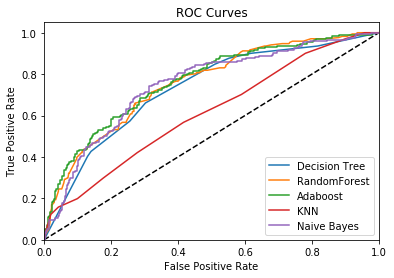

In [27]:
#ROC Curve
y_score_tree = tree_df.loc[51, 'score']
y_score_rf = rf_df.loc[97, 'score']
y_score_ab = adaboost_df.loc[20, 'score']
y_score_knn = knn_df.loc[56, 'score']
y_score_nb = nb_df.loc[0, 'score']
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test,y_score_rf)
fpr_ab, tpr_ab, _ = roc_curve(y_test,y_score_ab)
fpr_knn, tpr_knn, _ = roc_curve(y_test,y_score_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test,y_score_nb)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr_tree,tpr_tree,label='Decision Tree')
plt.plot(fpr_rf,tpr_rf,label='RandomForest')
plt.plot(fpr_ab,tpr_ab,label='Adaboost')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.plot(fpr_nb,tpr_nb,label='Naive Bayes')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [30]:
importances = dict()
importances['tree'] = tree_df.loc[51, 'imp_features']
importances['rf'] = rf_df.loc[97, 'imp_features']
importances['ab'] = adaboost_df.loc[20, 'imp_features']
importances['knn'] = knn_df.loc[56, 'imp_features']
importances['nb'] = nb_df.loc[0, 'imp_features']

for k, imp in importances.items():
    if imp is None:
        continue
    indices = np.argsort(imp)[::-1]
    print("Feature ranking: {}".format(k))
    for f in range(min(20, len(indices))):
        print("%d. %s (%f)" % (f + 1, x.iloc[:,indices[f]].name, imp[indices[f]]))

Feature ranking: tree
1. rating (0.668418)
2. 3m_count_similar (0.215948)
3. 2m_count_similar (0.049934)
4. 0.5m_count (0.041821)
5. review_count (0.023878)
6. 3m_count (0.000000)
7. 2m_count (0.000000)
8. 1m_count_similar (0.000000)
9. 1m_count (0.000000)
10. 0.5m_count_similar (0.000000)
Feature ranking: rf
1. 1m_count_similar (0.408566)
2. rating (0.183798)
3. 2m_count_similar (0.102254)
4. 3m_count_similar (0.088645)
5. 0.5m_count_similar (0.083404)
6. 1m_count (0.066667)
7. 0.5m_count (0.066667)
8. 3m_count (0.000000)
9. 2m_count (0.000000)
10. review_count (0.000000)
Feature ranking: ab
1. rating (0.209157)
2. 2m_count (0.137250)
3. review_count (0.127004)
4. 1m_count_similar (0.124578)
5. 0.5m_count_similar (0.106601)
6. 1m_count (0.093596)
7. 0.5m_count (0.091321)
8. 3m_count (0.087565)
9. 3m_count_similar (0.014829)
10. 2m_count_similar (0.008099)


In [ ]:
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(x_test.shape[1])[:10], importances[indices][:10],align="center")
plt.yticks(range(x_test.shape[1])[:10], x.iloc[:,indices].columns)
plt.ylim([-1, 10])